In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
data_path = Path('..') / 'data' / 'Advertising.csv'
df = pd.read_csv(data_path)

In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='TV'>

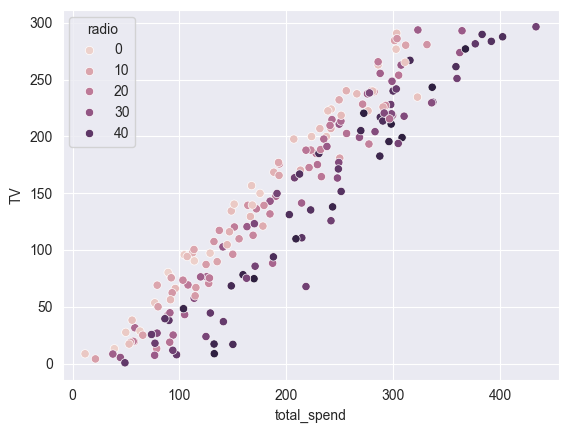

In [4]:
sns.scatterplot(data=df, x='total_spend', y='TV', hue='radio')

<Axes: xlabel='total_spend', ylabel='sales'>

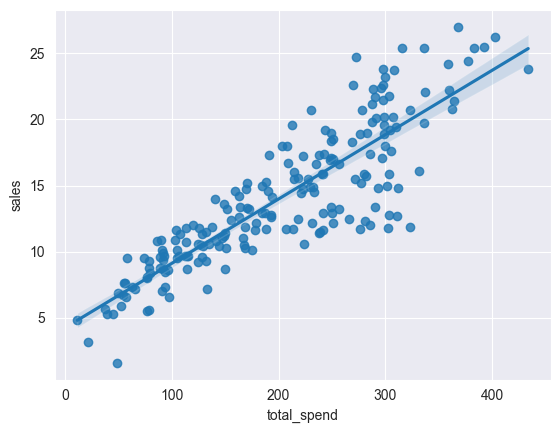

In [5]:
sns.regplot(data=df, x='total_spend', y='sales')

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend = np.linspace(0, 500, 100)

In [9]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

<Axes: xlabel='total_spend', ylabel='sales'>

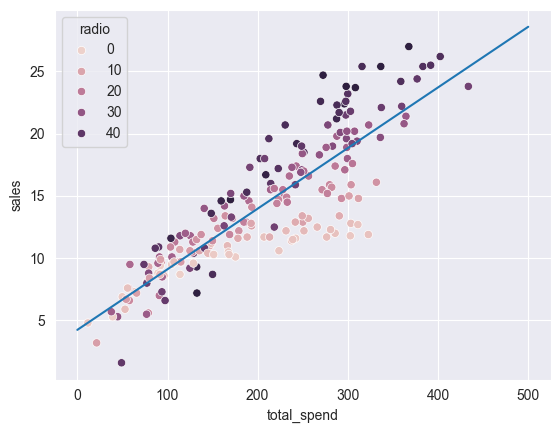

In [10]:
plt.plot(potential_spend, predicted_sales)
sns.scatterplot(data=df, x='total_spend', y='sales', hue='radio')

In [11]:
spend = 200
predicted_sales = 0.04868788 * potential_spend + 4.24302822

In [12]:
predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

In [13]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [14]:
pot_spend = np.linspace(0, 500, 100)

In [15]:
pred_sales = 3.07615033e-07 * pot_spend**3 -1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

In [16]:
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

<Axes: xlabel='total_spend', ylabel='sales'>

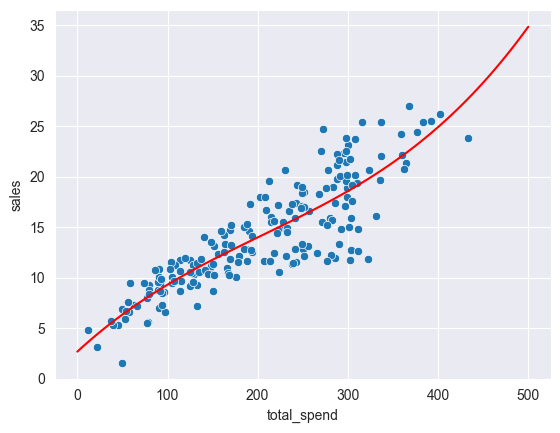

In [17]:
plt.plot(pot_spend, pred_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

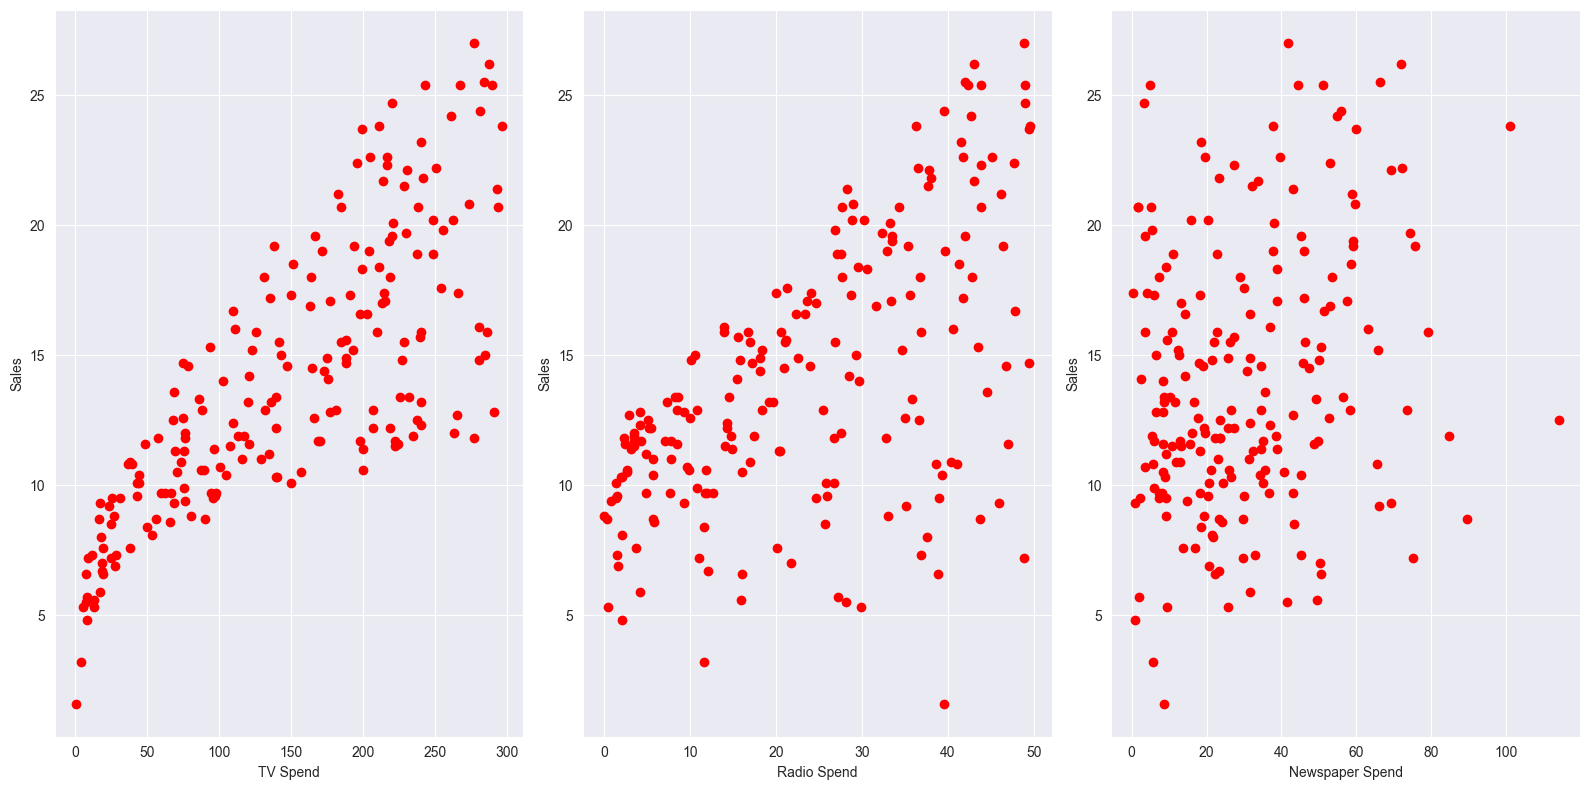

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

axes[0].plot(df['TV'], df['sales'], 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

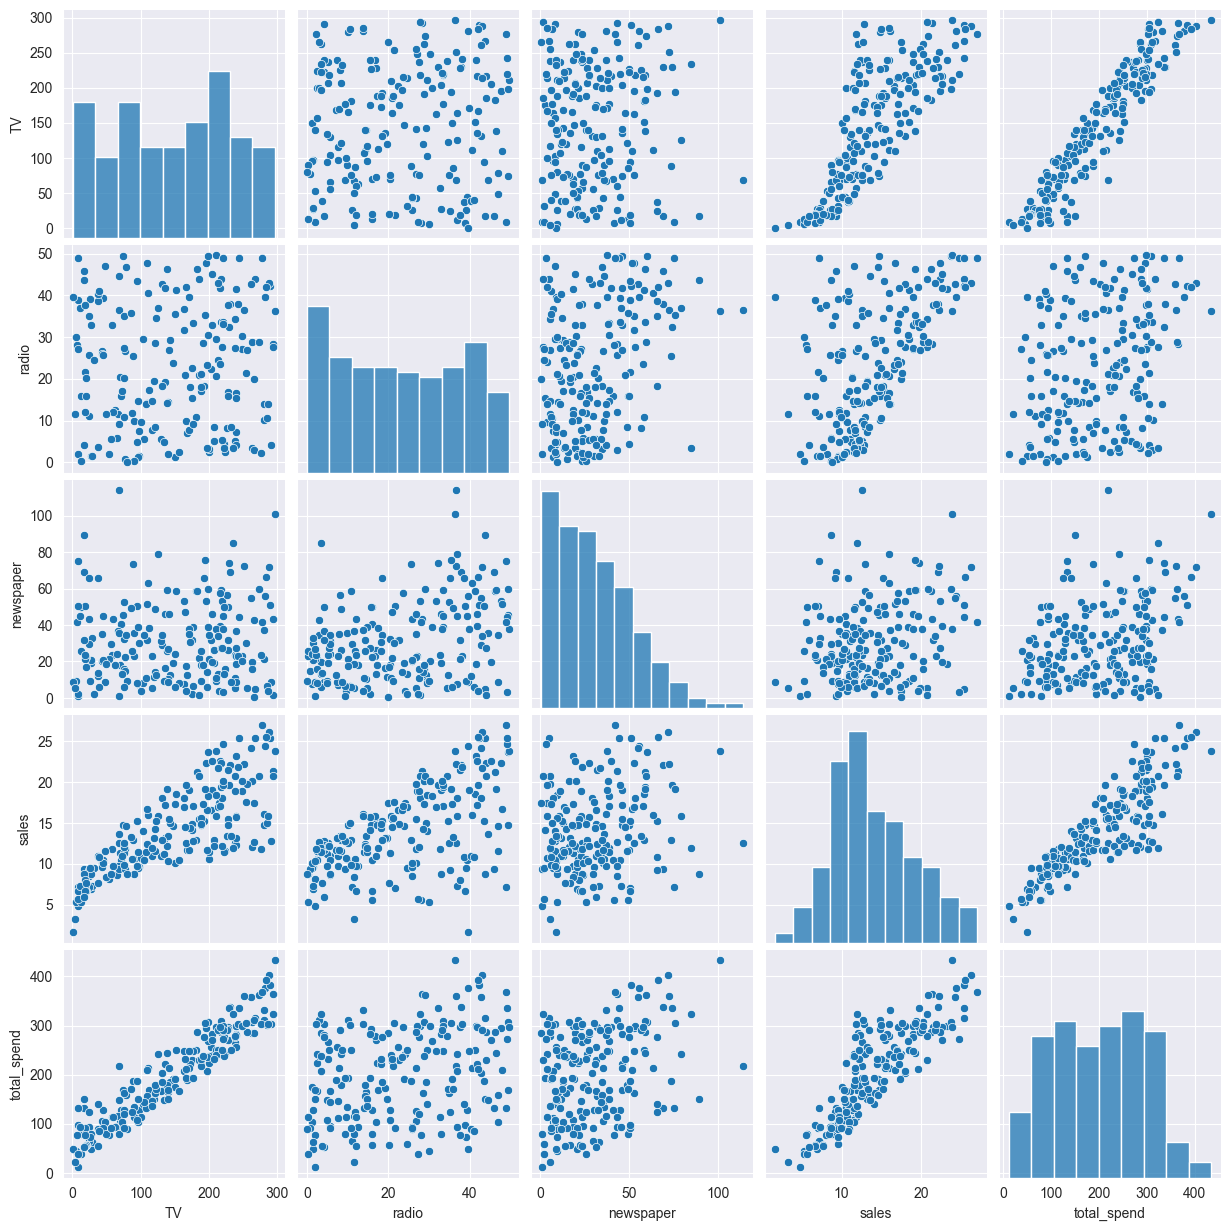

In [20]:
sns.pairplot(df)

In [21]:
X = df.drop('sales', axis=1)

In [22]:
y = df['sales']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
test_predictions = model.predict(X_test)

In [28]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

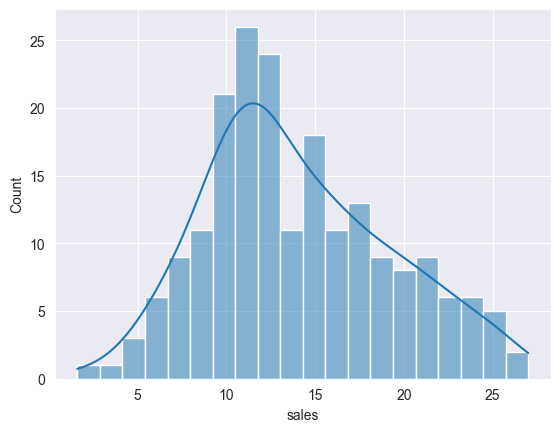

In [29]:
sns.histplot(data=df, x='sales', bins=20, kde=True)

In [30]:
mean_absolute_error(y_test, test_predictions)

1.5116692224549084

In [31]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.9485372043446387

In [32]:
import scipy as sp

In [33]:
test_residuals = y_test - model.predict(X_test)

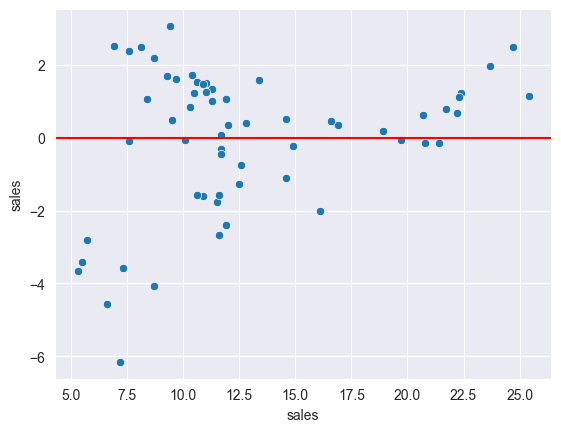

In [34]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red')

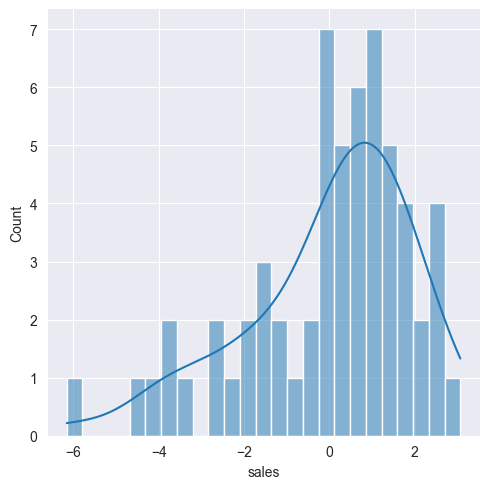

In [35]:
sns.displot(test_residuals, bins=25, kde=True)

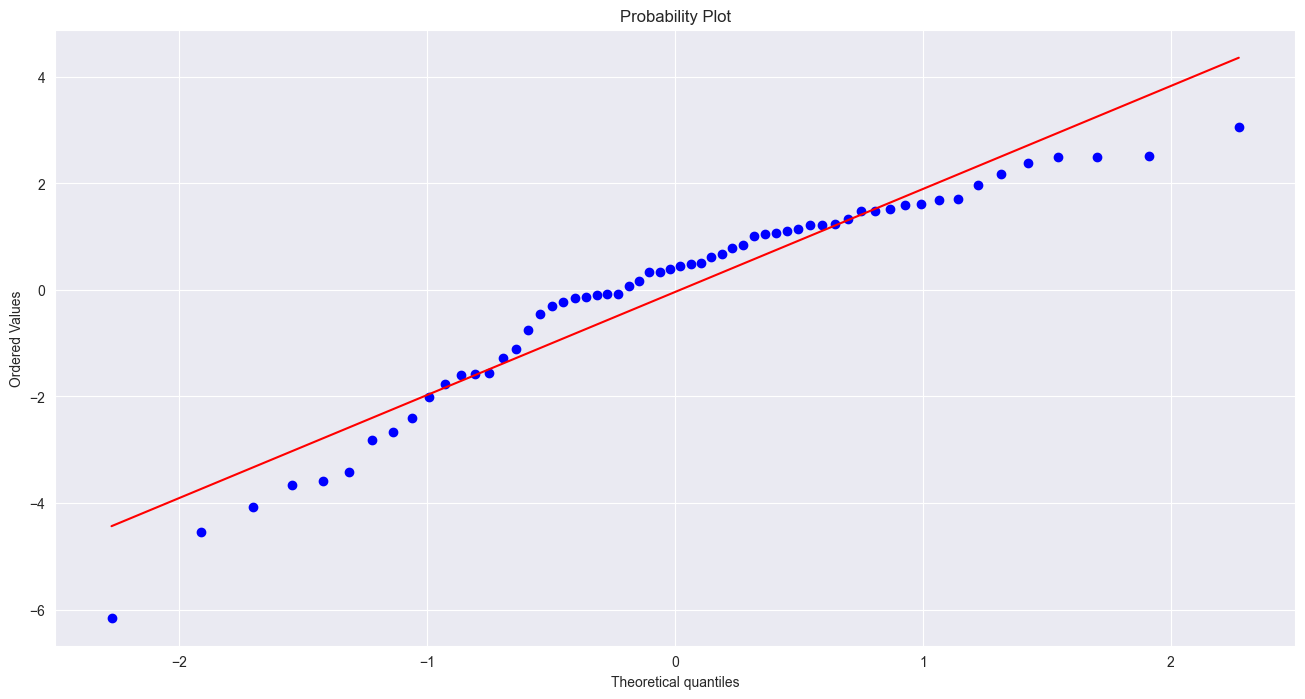

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = sp.stats.probplot(test_residuals, dist='norm', plot=ax)

In [37]:
final_model = LinearRegression()

In [38]:
final_model.fit(X_train, y_train)

LinearRegression()

In [39]:
final_model.coef_

array([-0.01849803,  0.13673019, -0.05567486,  0.06255731])

In [40]:
y_hat = final_model.predict(X)

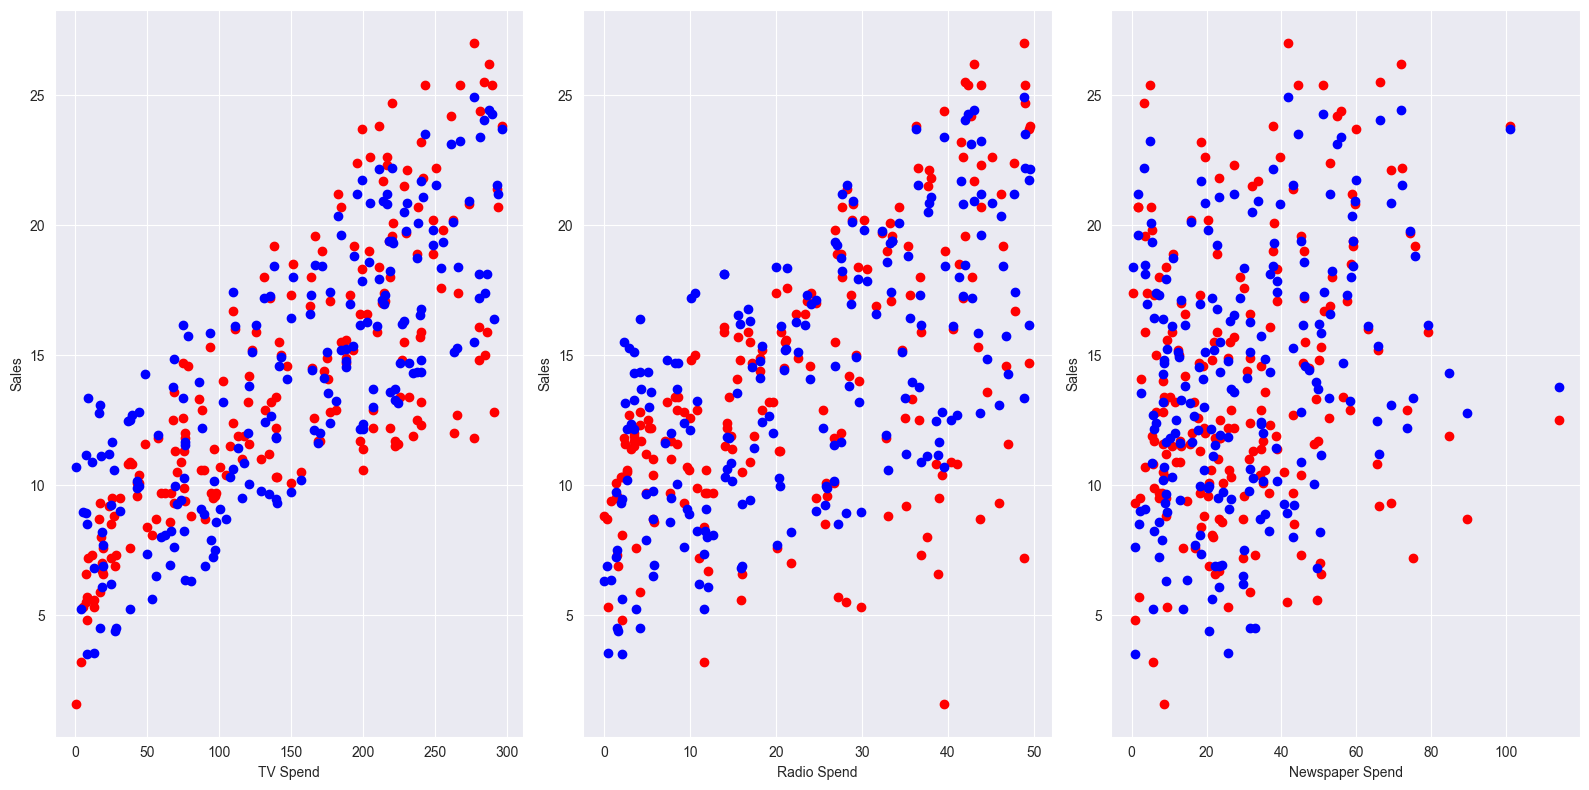

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes[0].plot(df['TV'], df['sales'], 'o', color='red')
axes[0].plot(df['TV'], y_hat, 'o', color='blue')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o', color='red')
axes[1].plot(df['radio'], y_hat, 'o', color='blue')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o', color='red')
axes[2].plot(df['newspaper'], y_hat, 'o', color='blue')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')
plt.tight_layout()

In [43]:
from joblib import dump, load

In [44]:
dump(final_model, 'saved_model.joblib')

['saved_model.joblib']

In [45]:
loaded_model = load('saved_model.joblib')

In [46]:
loaded_model.coef_

array([-0.01849803,  0.13673019, -0.05567486,  0.06255731])

In [55]:
campaign = pd.DataFrame([[149, 22, 12]], columns=['TV', 'radio', 'newspaper'])

In [58]:
campaign['total_spend'] = campaign['TV'] + campaign['radio'] + campaign['newspaper']

In [59]:
loaded_model.predict(campaign)

array([13.74069631])

In [60]:
X = df.drop('sales', axis=1)

In [61]:
y = df['sales']

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [65]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [66]:
poly_features = polynomial_converter.transform(X)

In [69]:
poly_features

array([[2.3010000e+02, 3.7800000e+01, 6.9200000e+01, ..., 4.7886400e+03,
        2.3327320e+04, 1.1363641e+05],
       [4.4500000e+01, 3.9300000e+01, 4.5100000e+01, ..., 2.0340100e+03,
        5.8133900e+03, 1.6615210e+04],
       [1.7200000e+01, 4.5900000e+01, 6.9300000e+01, ..., 4.8024900e+03,
        9.1753200e+03, 1.7529760e+04],
       ...,
       [1.7700000e+02, 9.3000000e+00, 6.4000000e+00, ..., 4.0960000e+01,
        1.2332800e+03, 3.7133290e+04],
       [2.8360000e+02, 4.2000000e+01, 6.6200000e+01, ..., 4.3824400e+03,
        2.5937160e+04, 1.5350724e+05],
       [2.3210000e+02, 8.6000000e+00, 8.7000000e+00, ..., 7.5690000e+01,
        2.1697800e+03, 6.2200360e+04]])

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [77]:
test_predictions = model.predict(X_test)

In [78]:
model.coef_

array([-1.11304453e+06, -1.11304457e+06, -1.11304457e+06,  1.11304458e+06,
        7.67295122e+07,  1.84822204e+07, -6.11794505e+06, -3.02642664e+08,
       -5.82472917e+07, -1.41094749e+08, -1.67665860e+08, -8.28474572e+07,
       -1.43065695e+08,  2.25913152e+08])

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
MAE = mean_absolute_error(y_test, test_residuals)

In [81]:
MSE = mean_squared_error(y_test, test_predictions)

In [82]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [84]:
MAE

13.386822285867733

In [85]:
MSE

0.4424786687969736

In [86]:
RMSE

0.6651907010752433

In [87]:
model.coef_

array([-1.11304453e+06, -1.11304457e+06, -1.11304457e+06,  1.11304458e+06,
        7.67295122e+07,  1.84822204e+07, -6.11794505e+06, -3.02642664e+08,
       -5.82472917e+07, -1.41094749e+08, -1.67665860e+08, -8.28474572e+07,
       -1.43065695e+08,  2.25913152e+08])

In [88]:
poly_features[0]

array([2.3010000e+02, 3.7800000e+01, 6.9200000e+01, 3.3710000e+02,
       5.2946010e+04, 8.6977800e+03, 1.5922920e+04, 7.7566710e+04,
       1.4288400e+03, 2.6157600e+03, 1.2742380e+04, 4.7886400e+03,
       2.3327320e+04, 1.1363641e+05])

In [89]:
poly_features

array([[2.3010000e+02, 3.7800000e+01, 6.9200000e+01, ..., 4.7886400e+03,
        2.3327320e+04, 1.1363641e+05],
       [4.4500000e+01, 3.9300000e+01, 4.5100000e+01, ..., 2.0340100e+03,
        5.8133900e+03, 1.6615210e+04],
       [1.7200000e+01, 4.5900000e+01, 6.9300000e+01, ..., 4.8024900e+03,
        9.1753200e+03, 1.7529760e+04],
       ...,
       [1.7700000e+02, 9.3000000e+00, 6.4000000e+00, ..., 4.0960000e+01,
        1.2332800e+03, 3.7133290e+04],
       [2.8360000e+02, 4.2000000e+01, 6.6200000e+01, ..., 4.3824400e+03,
        2.5937160e+04, 1.5350724e+05],
       [2.3210000e+02, 8.6000000e+00, 8.7000000e+00, ..., 7.5690000e+01,
        2.1697800e+03, 6.2200360e+04]])

In [90]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):

    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

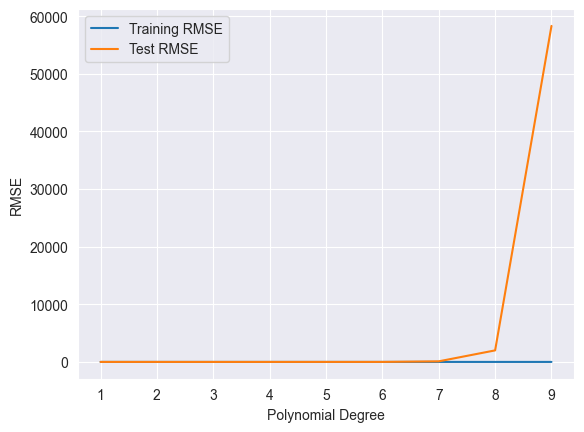

In [91]:
import matplotlib.pyplot as plt

degrees = range(1, 10)
plt.plot(degrees, train_rmse_errors, label='Training RMSE')
plt.plot(degrees, test_rmse_errors, label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()


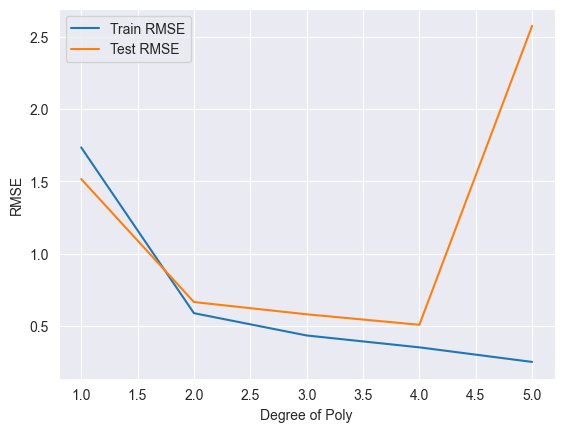

In [92]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

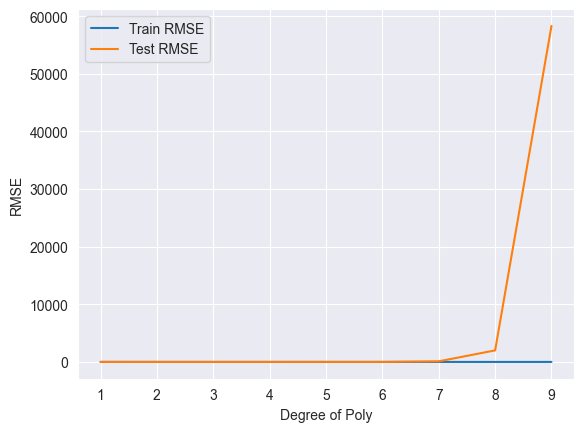

In [93]:
plt.plot(range(1, 10), train_rmse_errors, label='Train RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [95]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [97]:
final_model = LinearRegression()

In [98]:
fully_converted_X = final_poly_converter.fit_transform(X)

In [99]:
final_model.fit(fully_converted_X, y)

LinearRegression()

In [100]:
from joblib import dump, load

In [109]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [110]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [111]:
loaded_converter = load('final_converter.joblib')

In [112]:
loaded_model = load('final_poly_model.joblib')

In [113]:
campaign = [[149, 22, 12]]

In [114]:
transformed_data = loaded_converter.fit_transform(campaign)

In [116]:
# loaded_model.predict(transformed_data)